In [1]:
import pandas as pd

df_drugs = pd.read_csv('drugs.csv')
display(df_drugs.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
# Explorar la forma (dimensiones) del DataFrame
print("Forma del DataFrame:", df_drugs.shape)

# Obtener un resumen conciso del DataFrame
print("\nInformación del DataFrame:")
df_drugs.info()

# Estadísticas descriptivas para las características numéricas
print("\nEstadísticas descriptivas:")
print(df_drugs.describe())

# Identificar valores únicos en las columnas categóricas
print("\nValores únicos en 'Sex':", df_drugs['Sex'].unique())
print("\nValores únicos en 'BP':", df_drugs['BP'].unique())
print("\nValores únicos en 'Cholesterol':", df_drugs['Cholesterol'].unique())
print("\nValores únicos en 'Drug':", df_drugs['Drug'].unique())

Forma del DataFrame: (200, 6)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB

Estadísticas descriptivas:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

Valores únicos en 'Sex': ['F' 'M']

Valores únicos en 'BP': ['HIGH' 'LOW' 'NORMAL']

Valores únicos en 'Cholesterol': ['HIGH' 'NORMAL']

Valo

## Cargue la base de datos “drugs.csv” en Python e investigue cómo convertir las variables predictoras cualitativas de esta base a una escala numérica mediante la instrucción “preprocessing.LabelEncoder()”. Por ejemplo, si una variable tiene 3 posibles categorías, deberá cambiar sus resultados a 0, 1 o 2. 

## Convertir características categóricas en representaciones numéricas mediante codificación de etiquetas.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df_drugs[col] = le.fit_transform(df_drugs[col])

display(df_drugs.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


## Use el método de Árboles de decisión para generar un modelo predictivo para este problema. Pruebe con los dos criterios vistos en esta lección (Gini y Entropía) y diversos niveles de profundidad. En cada caso elabore un reporte de clasificación detallado. Interprete verbalmente sus indicadores y determine cuál es la mejor opción.

## Dividir los datos en conjuntos de entrenamiento y de prueba mediante train_test_split.

In [4]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_drugs.drop('Drug', axis=1)
y = df_drugs['Drug']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo 

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador de árbol de decisión
modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

## calcular exactitud

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicciones)

1.0

In [10]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1, 15):
    modelo = DecisionTreeClassifier(max_depth= i)
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    exactitud = accuracy_score(y_test, predicciones)
    print(f"Profundidad del árbol: {i}, Exactitud: {exactitud:.2f}")
    resultados.append(exactitud)

Profundidad del árbol: 1, Exactitud: 0.65
Profundidad del árbol: 2, Exactitud: 0.80
Profundidad del árbol: 3, Exactitud: 0.88
Profundidad del árbol: 4, Exactitud: 1.00
Profundidad del árbol: 5, Exactitud: 1.00
Profundidad del árbol: 6, Exactitud: 1.00
Profundidad del árbol: 7, Exactitud: 1.00
Profundidad del árbol: 8, Exactitud: 1.00
Profundidad del árbol: 9, Exactitud: 1.00
Profundidad del árbol: 10, Exactitud: 1.00
Profundidad del árbol: 11, Exactitud: 1.00
Profundidad del árbol: 12, Exactitud: 1.00
Profundidad del árbol: 13, Exactitud: 1.00
Profundidad del árbol: 14, Exactitud: 1.00


# Grafica de resultados exactitud


<Axes: >

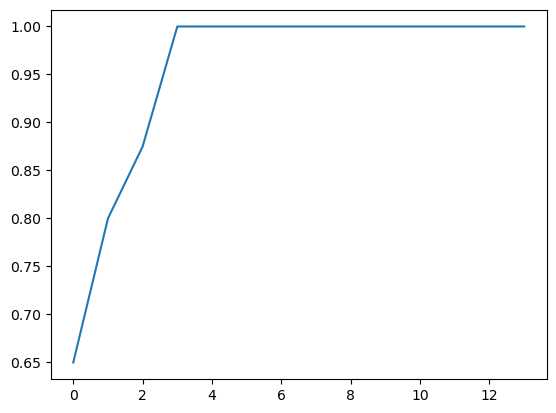

In [12]:
import seaborn as sb 

sb.lineplot(data= resultados)

# Arboles de deccion con Gini y entropia 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Árbol de decisión con criterio Gini
modelo_gini = DecisionTreeClassifier(criterion='gini', max_depth=10)
modelo_gini.fit(X_train, y_train)
predicciones_gini = modelo_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, predicciones_gini)
print(f"Precisión con Gini: {accuracy_gini}")

# Árbol de decisión con criterio Entropía
modelo_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=10)
modelo_entropy.fit(X_train, y_train)
predicciones_entropy = modelo_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, predicciones_entropy)
print(f"Precisión con Entropía: {accuracy_entropy}")

Precisión con Gini: 1.0
Precisión con Entropía: 1.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Inicializar modelos de DecisionTreeClassifier
dt_gini_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
dt_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_gini_10 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_entropy_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
dt_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_entropy_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

models = [dt_gini_2, dt_gini_5, dt_gini_10, dt_entropy_2, dt_entropy_5, dt_entropy_10]
reports = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=0)  # Manejar divisiones por cero
    reports.append(report)
    print(f"Reporte de Clasificación para {model}:\n{report}\n")

best_model = None
best_score = -1

for i, report in enumerate(reports):
    lines = report.split('\n')
    for line in lines:
        if "accuracy" in line:
            accuracy = float(line.split()[1])
        elif "macro avg" in line:
            metrics = line.split()
            f1_macro_avg = float(metrics[4])
            break

    # Combinar precisión y promedio F1-macro
    score = accuracy * 0.5 + f1_macro_avg * 0.5

    if score > best_score:
        best_score = score
        best_model = models[i]

print(f"El mejor modelo es {best_model} con una puntuación combinada de {best_score}")


Reporte de Clasificación para DecisionTreeClassifier(max_depth=2, random_state=42):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.69      1.00      0.81        11
           4       1.00      1.00      1.00        15

    accuracy                           0.80        40
   macro avg       0.47      0.60      0.52        40
weighted avg       0.66      0.80      0.72        40


Reporte de Clasificación para DecisionTreeClassifier(max_depth=5, random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy    

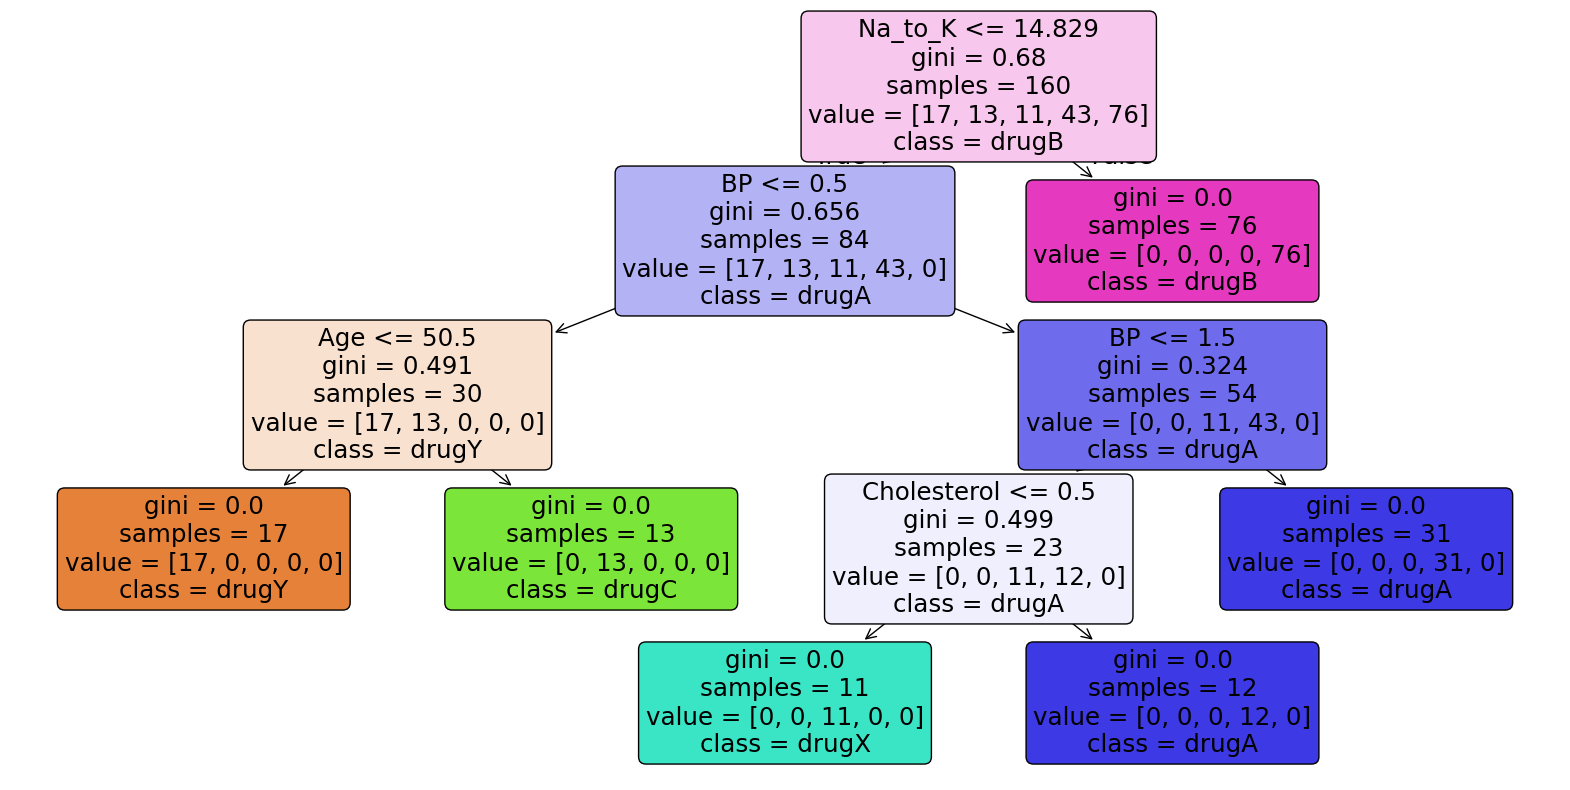

Importancia de la característica Age: 0.13551007894535144
Importancia de la característica Sex: 0.0
Importancia de la característica BP: 0.26565779620454866
Importancia de la característica Cholesterol: 0.10557149569616205
Importancia de la característica Na_to_K: 0.4932606291539378

Reglas de decisión (ejemplo):
Si Na_to_K es menor que 10 y Cholesterol es 0, entonces predecir drugY
Si Na_to_K es mayor o igual a 10 y Sex es 1, entonces predecir drugA


In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que 'best_model' ya está definido en el paso anterior
plt.figure(figsize=(20,10))
plot_tree(
    best_model, 
    feature_names=X_train.columns, 
    class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], 
    filled=True, 
    rounded=True
)
plt.show()

# Extraer la importancia de las características
feature_importances = best_model.feature_importances_

# Imprimir la importancia de cada característica
for i, feature_name in enumerate(X_train.columns):
    print(f"Importancia de la característica {feature_name}: {feature_importances[i]}")

# Explicar las reglas basadas en la visualización del árbol y la importancia de características
# Ejemplo:
# Si Na_to_K es menor que X y Cholesterol es Y, entonces predecir drugZ

# Nota: Las reglas reales deben derivarse de la visualización del árbol (plot_tree)
# y de la importancia de características. El ejemplo de abajo es solo ilustrativo.
print("\nReglas de decisión (ejemplo):")
print("Si Na_to_K es menor que 10 y Cholesterol es 0, entonces predecir drugY")
print("Si Na_to_K es mayor o igual a 10 y Sex es 1, entonces predecir drugA")

# Reglas de decisión del árbol de clasificación:

# 1. Nodo raíz: Na_to_K <= 14.829
#    - Si NO se cumple (Na_to_K > 14.829), se predice drugB (76 muestras puras).
#    - Si SÍ se cumple, se sigue evaluando BP.

# 2. Nodo intermedio: BP <= 0.5
#    - Si SÍ se cumple, se evalúa Age.
#    - Si NO se cumple, se evalúa BP nuevamente.

# 3. Rama izquierda (BP <= 0.5):
#    - Si Age <= 50.5: predice drugY (17 muestras puras).
#    - Si Age > 50.5: predice drugC (13 muestras puras).

# 4. Rama derecha (BP > 0.5):
#    - Si BP <= 1.5:
#         - Si Cholesterol <= 0.5: predice drugX (11 muestras puras).
#         - Si Cholesterol > 0.5: predice drugA (12 muestras puras).
#    - Si BP > 1.5: predice drugA (31 muestras puras).

# Reglas finales expresadas verbalmente:
# - Si Na_to_K > 14.829 → drugB
# - Si Na_to_K <= 14.829 and BP <= 0.5 and Age <= 50.5 → drugY
# - Si Na_to_K <= 14.829 and BP <= 0.5 and Age > 50.5 → drugC
# - Si Na_to_K <= 14.829 and BP > 0.5 and BP <= 1.5 and Cholesterol <= 0.5 → drugX
# - Si Na_to_K <= 14.829 and BP > 0.5 and BP <= 1.5 and Cholesterol > 0.5 → drugA
# - Si Na_to_K <= 14.829 and BP > 1.5 → drugA


## El árbol primero evalúa el nivel de Na_to_K, que parece ser la variable más determinante. Si este valor es alto (>14.829), directamente se predice drugB. Si es bajo, entonces se consideran otras variables como BP (presión arterial), edad y colesterol para tomar la decisión final. La ruta seguida por cada observación depende de los valores de esas características, lo que hace que el árbol sea interpretable y útil para entender el criterio del modelo.

# ¿Qué medicamento recomendaría utilizar para un paciente con los siguientes datos? 

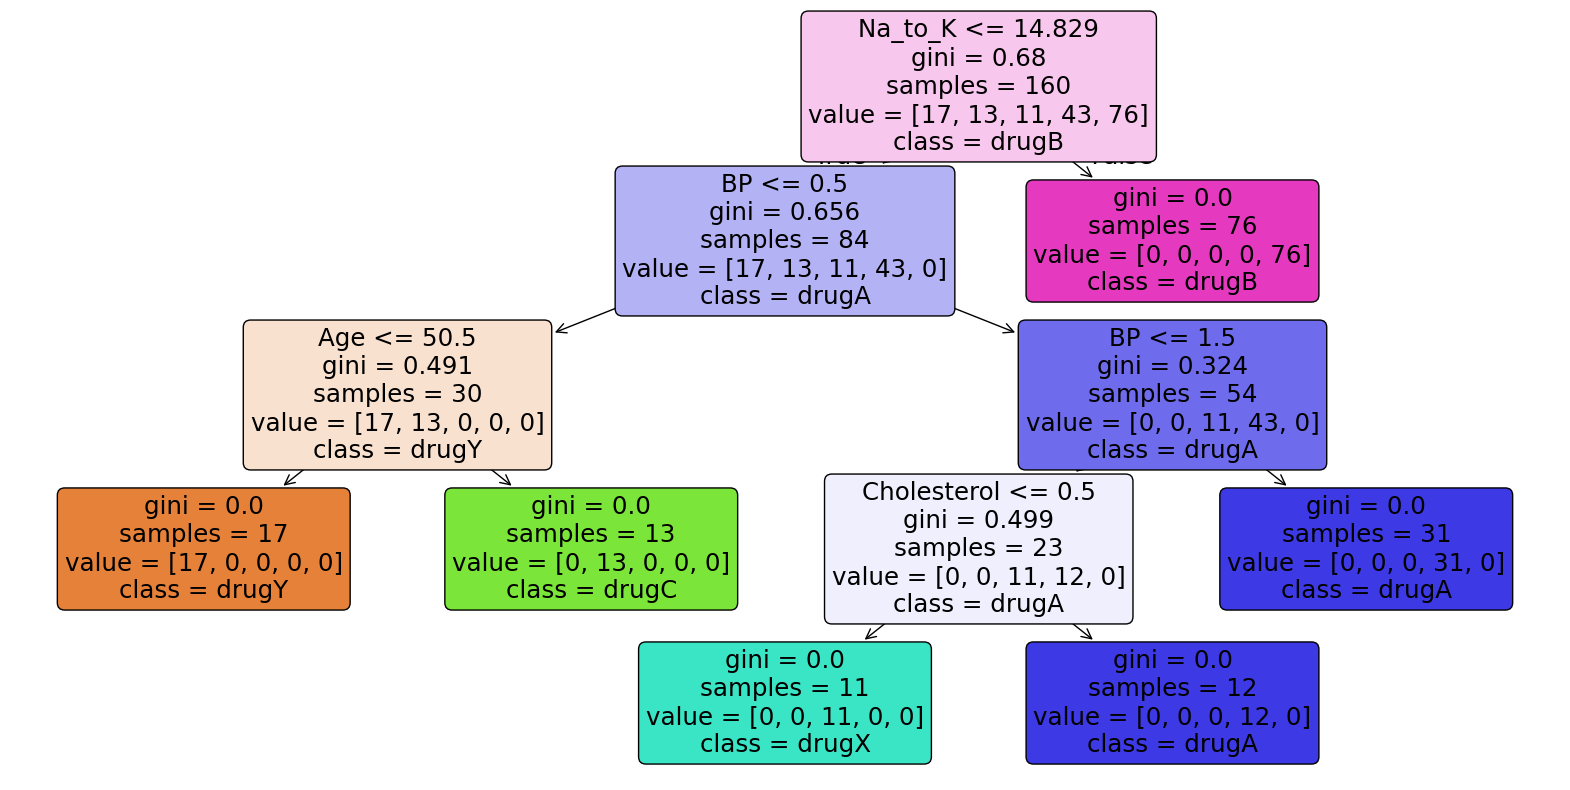

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar el mejor modelo
plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],  # Ajusta según tus clases
    filled=True,
    rounded=True
)
plt.show()

In [19]:
import numpy as np

# Nuevo dato a predecir
nuevo_dato = [50, 'F', 'HIGH', 'NORMAL', 15.302]

# Codificar las variables categóricas (asegúrate de usar los mismos mapeos o LabelEncoder)
map_sex = {'F': 0, 'M': 1}
map_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
map_cholesterol = {'NORMAL': 0, 'HIGH': 1}

nuevo_dato[1] = map_sex[nuevo_dato[1]]
nuevo_dato[2] = map_bp[nuevo_dato[2]]
nuevo_dato[3] = map_cholesterol[nuevo_dato[3]]

# Convertir a un array numpy y redimensionar
nuevo_dato = np.array(nuevo_dato).reshape(1, -1)

# Predecir con el mejor modelo
prediccion = best_model.predict(nuevo_dato)
print(f"Predicción para el nuevo dato: {prediccion[0]}")

Predicción para el nuevo dato: 4


/Users/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df_drugs[col] = le.fit_transform(df_drugs[col])

# Crear un nuevo LabelEncoder para la columna 'Drug'
le_drug = LabelEncoder()
le_drug.fit(df_drugs['Drug'])

# Mostrar el mapeo de categorías a valores numéricos
drug_mapping = dict(zip(le_drug.classes_, le_drug.transform(le_drug.classes_)))
print("Mapeo de categorías en 'Drug':", drug_mapping)

# Determinar cuál es el valor 4
for drug, value in drug_mapping.items():
    if value == 4:
        print(f"La categoría correspondiente al valor 4 es: {drug}")


Mapeo de categorías en 'Drug': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
La categoría correspondiente al valor 4 es: 4


## Por lo tanto como respuesta se recomienda el medicamento "drugyY"